## Assignment 3: Churn analysis on Reddit - Robert Scott, Nicholas Petr - MSCA 37014 2 Python for Analytics

### Import required packages 

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt

### Import dataset and convert utc to datetime 

In [2]:
reddit_data = pd.read_feather("RC_2012_year_cohort.feather")
reddit_data.created_utc = pd.to_datetime(reddit_data.created_utc, unit = 's')
reddit_data.head()

,created_utc,author,subreddit
0,2012-01-01 00:00:00,irwinator,AskReddit
1,2012-01-01 00:00:00,reed311,politics
2,2012-01-01 00:00:00,sagapo3851,gaming
3,2012-01-01 00:00:00,filthgrinder,politics
4,2012-01-01 00:00:01,BitterDivorcedDad,WTF


### Aggregate and sort for the top 30 subreddits 

In [3]:
# Aggregate and sort for top 30
subred = reddit_data.subreddit.unique()
subred = dict(zip(subred, np.zeros(len(subred)).tolist()))

In [4]:
# Aggregate and sort for top 30
for i in reddit_data.subreddit:
    subred[i] += 1

In [5]:
subred_tpl = [(i, subred[i]) for i in subred.keys()]
subred_tpl
subred_tpl.sort(key = lambda x: x[1])
top30 = subred_tpl[-30:]
top30

[('guns', 1024160.0),
 ('Games', 1068527.0),
 ('Guildwars2', 1080067.0),
 ('mylittlepony', 1093572.0),
 ('Diablo', 1100630.0),
 ('nba', 1116769.0),
 ('Music', 1146500.0),
 ('soccer', 1339712.0),
 ('Minecraft', 1491322.0),
 ('technology', 1503424.0),
 ('aww', 1691410.0),
 ('starcraft', 1729070.0),
 ('movies', 1745437.0),
 ('nfl', 2003374.0),
 ('gonewild', 2168728.0),
 ('worldnews', 2270210.0),
 ('fffffffuuuuuuuuuuuu', 2785323.0),
 ('todayilearned', 2858174.0),
 ('AdviceAnimals', 3571534.0),
 ('videos', 3611531.0),
 ('trees', 3846708.0),
 ('IAmA', 3883036.0),
 ('leagueoflegends', 4029221.0),
 ('atheism', 5043438.0),
 ('politics', 5397547.0),
 ('WTF', 6377885.0),
 ('gaming', 6966306.0),
 ('pics', 8973606.0),
 ('funny', 11909021.0),
 ('AskReddit', 32023468.0)]

### Function generating daily retention rates 

In [6]:
# Errors here, but on the right track for O(n)

def calc_retention_curve(sr, df):
    filtered = df.loc[df.subreddit == sr, ['created_utc', 'author']]
    commenters = filtered.author.unique()
    first_comment = dict(zip(commenters, np.zeros(len(commenters)).tolist()))
    for i in filtered.index:
        author = filtered.author[i]
        cutc = filtered.created_utc[i]
        if first_comment[author] == 0:
            first_comment[author] = cutc
        elif first_comment[author] > cutc:
            first_comment[author] = cutc
    
    first_comment = pd.DataFrame(first_comment.items(), columns = ['author', 'first_comment'])
    filtered = pd.merge(filtered, first_comment, how = 'left', on = 'author')
    filtered['num_days'] = (filtered.created_utc - filtered.first_comment).dt.days
    filtered.drop(['first_comment', 'created_utc'], axis = 1, inplace = True)
    filtered.drop_duplicates(inplace = True, ignore_index = True)
    filtered['commented'] = np.ones(len(filtered))
    pivot_filtered = filtered.pivot(index = 'author', columns = 'num_days', values = 'commented')
    pivot_filtered = pivot_filtered.fillna(0)
    pivot_filtered.drop(['[deleted]'], axis = 0, inplace = True)
    sums = pivot_filtered.sum(axis = 0)
    ratios = sums / sums.iloc[0]
    return ratios.tolist()

In [7]:
calc_retention_curve('chicago', reddit_data)

[1.0,
 0.06587942821628341,
 0.042650714729645746,
 0.03884400248601616,
 0.03224052206339341,
 0.03550341827221877,
 0.03356121814791796,
 0.032939714108141706,
 0.02913300186451212,
 0.027268489745183342,
 0.029599129894344312,
 0.027579241765071472,
 0.030220633934120573,
 0.031230577998756993,
 0.028278433809819765,
 0.027967681789931635,
 0.025714729645742698,
 0.026258545680546922,
 0.025870105655686763,
 0.028666873834679925,
 0.0281230577998757,
 0.0281230577998757,
 0.02711311373523928,
 0.0254816656308266,
 0.025015537600994408,
 0.02618085767557489,
 0.023384089496581727,
 0.024238657551274082,
 0.026957737725295215,
 0.022684897451833438,
 0.023306401491609695,
 0.024704785581106278,
 0.020276569297700435,
 0.021364201367308887,
 0.025015537600994408,
 0.023384089496581727,
 0.023927905531385955,
 0.022607209446861405,
 0.022296457426973275,
 0.022218769422001242,
 0.022374145431945307,
 0.022374145431945307,
 0.022529521441889373,
 0.020509633312616533,
 0.0199658172778123

### Run top 30 subreddits through retention analysis and plot

Finished plotting  guns
Finished plotting  Games
Finished plotting  Guildwars2
Finished plotting  mylittlepony
Finished plotting  Diablo
Finished plotting  nba
Finished plotting  Music
Finished plotting  soccer
Finished plotting  Minecraft
Finished plotting  technology
Finished plotting  aww
Finished plotting  starcraft
Finished plotting  movies
Finished plotting  nfl
Finished plotting  gonewild
Finished plotting  worldnews
Finished plotting  fffffffuuuuuuuuuuuu
Finished plotting  todayilearned
Finished plotting  AdviceAnimals
Finished plotting  videos
Finished plotting  trees
Finished plotting  IAmA
Finished plotting  leagueoflegends
Finished plotting  atheism
Finished plotting  politics
Finished plotting  WTF
Finished plotting  gaming
Finished plotting  pics
Finished plotting  funny
Finished plotting  AskReddit


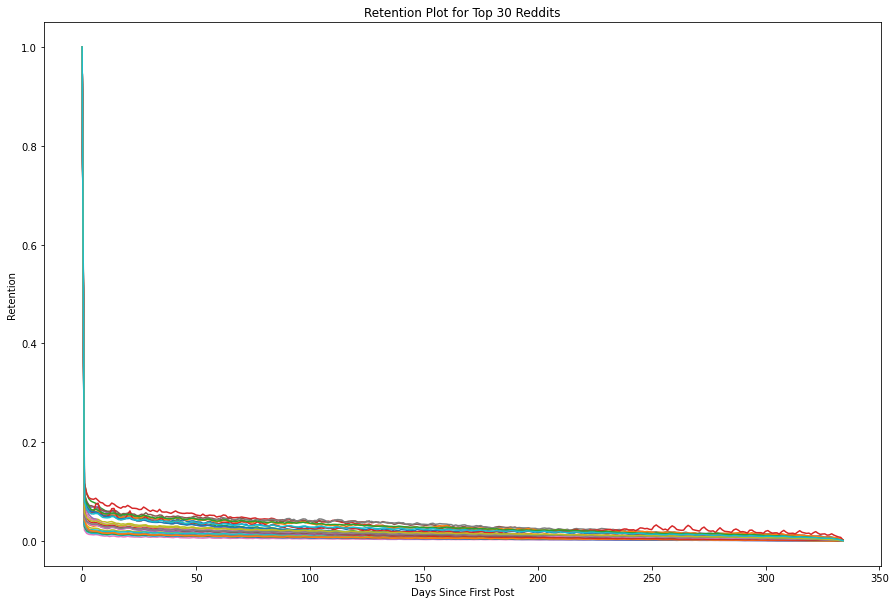

In [8]:
plt.figure(figsize = (15, 10))

for auth in top30:
    retention = calc_retention_curve(auth[0], reddit_data)
    plt.plot(np.arange(0,len(retention)), retention)
    print('Finished plotting ', auth[0])

plt.xlabel("Days Since First Post")
plt.ylabel("Retention")
plt.title("Retention Plot for Top 30 Reddits")
plt.show()